# Laboratorium 11 - Generatory Liczb Losowych

##### Aleksandra Mazur

## Zadanie 1 Testowanie generatorów liczb losowych

#### Dla obydwu generatorów liczb losowych (Mersenne Twister oraz PCG64) oraz dla n = 10, 1000, 5000 wylosuj n liczb losowych pochodzących z rozkładu jednostajnego i wykonaj następujące kroki.
#### 1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach.


W zadaniach użyto następujących bibliotek:
* random
* numpy
* matplotlib
* math
* scipy
* time

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import math
from scipy import stats
import time

Funkcja **generate_n_numbers** losuje *n* liczb, używając funkcji *function* przekazanej jako argument i zwraca te liczby. Dodatkowo mierzy czas działania funkcji.

In [2]:
def generate_n_numbers(n, function):
    start = time.time()
    numbers = []
    for i in range(n):
        numbers.append(function())
    end = time.time()
    return numbers, end - start

Funkcja **generate_random_numbers** korzystając z powyższej funkcji, tworzy 6 wektorów zawierających 10, 1000 i 5000 liczb losowych, wygenerowanych przez funkcje *random.random()* i *numpy.random.default_rng().random()*. Zwraca macierz zawierającą wspomniane wektory razem z ich nazwami oraz wypisuje czasy działania funkcji.

In [3]:
def generate_random_numbers():
    numbers_MT_10, time_MT_10 = generate_n_numbers(10, random.random)
    numbers_MT_1000, time_MT_1000 = generate_n_numbers(1000, random.random)
    numbers_MT_5000, time_MT_5000 = generate_n_numbers(5000, random.random)
    
    
    numpy_generator = numpy.random.default_rng()
    numbers_PCG_10, time_PCG_10 = generate_n_numbers(10, numpy_generator.random)
    numbers_PCG_1000, time_PCG_1000 = generate_n_numbers(1000, numpy_generator.random)
    numbers_PCG_5000, time_PCG_5000 = generate_n_numbers(5000, numpy_generator.random)
    
    numbers = []
    
    numbers.append((numbers_MT_10, "Mersenne Twister, n = 10"))
    numbers.append((numbers_PCG_10, "PCG64, n = 10"))
    
    numbers.append((numbers_MT_1000, "Mersenne Twister, n = 1000"))
    numbers.append((numbers_PCG_1000, "PCG64, n = 1000"))
    
    numbers.append((numbers_MT_5000, "Mersenne Twister, n = 5000"))
    numbers.append((numbers_PCG_5000, "PCG64, n = 5000"))
    
    print("Mersenne Twister, n = 10, time = ", time_MT_10)
    print("PCG64, n = 10, time = ", time_PCG_10)
    if (time_MT_10 < time_PCG_10):
        print("Mersenne Twister is faster")
    elif (time_MT_1000 > time_PCG_1000):
        print("PCG64 is faster")
    print("")
    
    print("Mersenne Twister, n = 1000, time = ", time_MT_1000)
    print("PCG64, n = 1000, time = ", time_PCG_1000)
    if (time_MT_1000 < time_PCG_1000):
        print("Mersenne Twister is faster")
    elif (time_MT_1000 > time_PCG_1000):
        print("PCG64 is faster")
    print("")
    
    print("Mersenne Twister, n = 5000, time = ", time_MT_5000)
    print("PCG64, n = 5000, time = ", time_PCG_5000)
    if (time_MT_5000 < time_PCG_5000):
        print("Mersenne Twister is faster")
    elif (time_MT_1000 > time_PCG_1000):
        print("PCG64 is faster")
    print("")
    
    
    return numbers

Macierz *numbers_with_names* zawiera pary składające się z wektora liczb losowych i nazwy (funkcja generującą liczby losowe wraz z ilością tych liczb).

In [4]:
numbers_with_names = generate_random_numbers()

Mersenne Twister, n = 10, time =  0.0
PCG64, n = 10, time =  0.0

Mersenne Twister, n = 1000, time =  0.0
PCG64, n = 1000, time =  0.007976055145263672
Mersenne Twister is faster

Mersenne Twister, n = 5000, time =  0.000997781753540039
PCG64, n = 5000, time =  0.03390955924987793
Mersenne Twister is faster



Funkcja **draw_histogram** przyjmuje wektor liczb *numbers*, nazwę *name* i tworzy histogram w 10 równych przedziałach.

In [5]:
def draw_histogram(numbers, name):
    plt.hist(x=numbers, bins=10)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(name)
    plt.show()

Dla każdego z sześciu wektorów, zawierających liczby losowe, utworzono histogram.

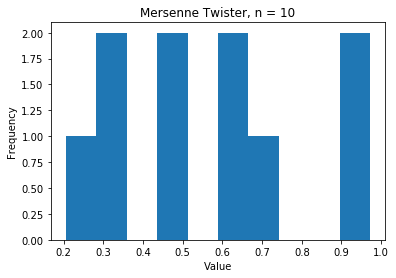

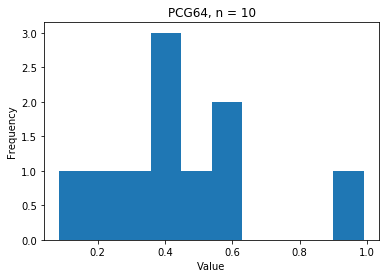

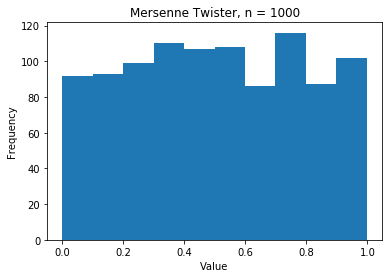

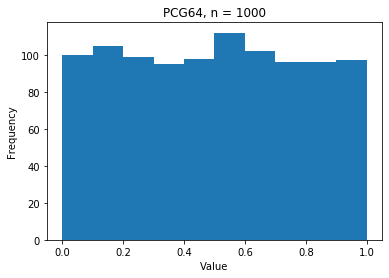

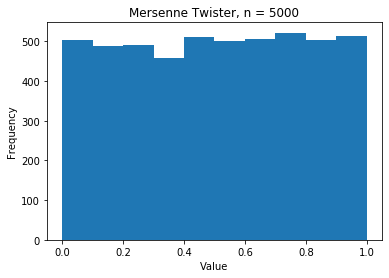

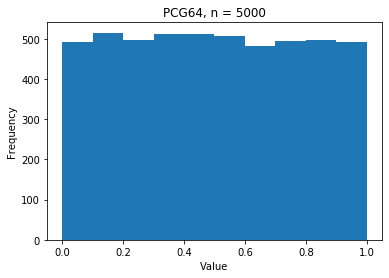

In [6]:
for (numbers, name) in numbers_with_names:
    draw_histogram(numbers, name)

### Wnioski:
Dla małej ilości liczb (n = 10), wylosowane liczby nie są równomiernie rozłożone - ich rozłożenie jest przypadkowe. Wraz ze zwiększaniem ilości liczb, ich rozkład wydaje się być bardziej równomierny dla obu algorytmów losowania. Ciężko stwierdzić, który algorytm losowania daje bardziej równomierny rozkład. Można jednak porównać czasy ich działania. Czas działania obu algorytmów rośnie wraz ze zwiększaniem liczby *n*, szybszy jest algorytm *Mersenne Twister*.

#### 2. Sprawdź dla ilu liczb spełniona jest nierówność $x_i < x_{i+1}$. Ile powinno ich być dla idealnego generatora?
Funkcja **check_numbers** przyjmuje wektor liczb *numbers*, nazwę *name* i zlicza dla ilu liczb spełniona jest nierówność $x_i < x_{i+1}$.

In [7]:
def check_numbers(numbers, name):
    print(name)
    counter = 0
    for i in range(0, len(numbers) - 1):
        if numbers[i] < numbers[i + 1]:
            counter += 1
    print(counter, "numbers")
    print("Difference with half of numbers: ", abs(int(len(numbers) / 2) - counter))
    print("")

Zastosowano powyższą funkcję dla wcześniej utworzonych wektorów.

In [8]:
for (numbers, name) in numbers_with_names:
    check_numbers(numbers, name)

Mersenne Twister, n = 10
5 numbers
Difference with half of numbers:  0

PCG64, n = 10
4 numbers
Difference with half of numbers:  1

Mersenne Twister, n = 1000
492 numbers
Difference with half of numbers:  8

PCG64, n = 1000
504 numbers
Difference with half of numbers:  4

Mersenne Twister, n = 5000
2486 numbers
Difference with half of numbers:  14

PCG64, n = 5000
2480 numbers
Difference with half of numbers:  20



### Wnioski:
Nierówność $x_i < x_{i+1}$ jest spełniona dla około połowy liczb zarówno dla generatora Mersenne Twister, jak i PCG64.

Uważam, że idealny generator powinien spełniać tą nierówność dla połowy liczb.

#### 3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final i wykorzystaj go do sprawdzenia wylosowanego ciągu liczb. Czy widać różnice pomiędzy generatorami? Czy wraz z rosnącym n coś się zmienia?

Funkcja **frequency_test** to implementacja pierwszego testu z podanego w poleceniu rozdziału - *Frequency (Monobit) Test*. Przyjmuje ona wektor słów *numbers* i nazwę *name*. Zakres liczb wektora numbers to przedział (0,1), więc obliczono sumę $S_n$ w taki sposób, że jeżeli dana liczba jest większa od $\frac{1}{2}$ to do sumy dodawano 1, a w przeciwnym przypadku - odejmowano 1. Kolejnym krokiem było obliczenie statystyki testowej $S_{obs} = \frac{|S_n|}{\sqrt{n}}$, gdzie n - ilość liczb w wektorze *numbers*. Następnie korzystając z funkcji *erfc* z biblioteki *math*, która jest funkcją błędu, obliczono wartość *p* (prawdopodobieństwo, że zależność jaką zaobserwowano w losowej próbie z populacji mogła wystąpić przypadkowo. Uzyskaną wartość *p* porównano z liczbą 0.01 i przedstawiono osiągnięty rezultat.

In [9]:
def frequency_test(numbers, name):
    n = len(numbers)
    S_n = 0
    
    for i in numbers:
        if i > 0.5:
            S_n += 1
        else:
            S_n -= 1
    
    S_obs = abs(S_n) / numpy.sqrt(n)
    P_value = math.erfc(S_obs / numpy.sqrt(2))
    print(name)
    if P_value < 0.01:
        print("The sequence is non-random, because P_value = ", P_value, " which is < 0.01")
    else:
        print("The sequence is random, because P_value = ", P_value, " which is >= 0.01")
    print("")

Powyższą funkcję wywołano dla każdego z sześciu wektorów.

In [10]:
for (numbers, name) in numbers_with_names:
    frequency_test(numbers, name)

Mersenne Twister, n = 10
The sequence is random, because P_value =  1.0  which is >= 0.01

PCG64, n = 10
The sequence is random, because P_value =  0.2059032107320683  which is >= 0.01

Mersenne Twister, n = 1000
The sequence is random, because P_value =  0.9495709711511051  which is >= 0.01

PCG64, n = 1000
The sequence is random, because P_value =  0.8495154923650349  which is >= 0.01

Mersenne Twister, n = 5000
The sequence is random, because P_value =  0.19323227845223837  which is >= 0.01

PCG64, n = 5000
The sequence is random, because P_value =  0.44506074954360986  which is >= 0.01



## Wnioski:

Głównym celem tego testu jest sprawdzenie proporcji liczb mniejszych od $\frac{1}{2}$ do większych od niej. Jeżeli jest ona w przybliżeniu taka sama, to można spodziewać się naprawdę losowej sekwencji liczb. Wartość *p*, czyli prawdopodobieństwo, że zależność jaką zaobserwowano mogła wystąpić przypadkowo, dla każdej sekwencji wygenerowanych liczb jest większa od 0.01, zatem można stwierdzić, że liczby są losowe.

Wartość *p* (prawdopodobieństwo) dla małych *n* jest przypadkowe, ale można zauważyć, że dla większych *n* - prawdopodobieństwo to rośnie wraz ze zwiększaniem *n* dla danego generatora. Przy czym wartość *p* jest przeważnie większa dla generatora *Mersenne Twister*.

Podsumowując *Mersenne Twister* jest jednym z lepszych generatorów używanych obecnie. Czas jego działania i prawdopodobieństwo przypadkowości wypada w jego przypadku lepiej niż dla generatora *PCG64*.

## Zadanie 2 Generowanie liczb z rozkładu normalnego

#### Zaimplementuj generator liczb losowych pochodzących z rozkładu normalnego za pomocą metody Boksa-Mullera i zaprezentuj wyniki dla n = 10, 100, 5000 wygenerowanych liczb. Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie standardowe jako parametry.
#### 1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. Na tym samym wykresie umieść funkcję gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach.

Funkcja **Box_Muller** to implementacja algorytmu o tej samej nazwie, która przyjmuje poniższe argumenty:
* n - ilość liczb, która ma być wygenerowana
* m - wartośc oczekiwana
* sigma - odchylenie standardowe

In [11]:
def Box_Muller(n, m, sigma):
    numbers = []
    
    for i in range(0, n):
        u = random.random()
        v = random.random()
        
        z1 = math.sqrt(-2 * math.log(u)) *math.sin(2 * numpy.pi * v)
        z2 = math.sqrt(-2 * math.log(u)) * math.cos(2 * numpy.pi * v)

        x1 = m + z1 * sigma
        x2 = m + z2 * sigma
        
        numbers.append(x1)
        numbers.append(x2)
        
    return numbers

Funkcja **draw_histogram_and_density** przyjmuje wektor liczb *numbers*, nazwę *name*, wartość oczekiwaną *m* i odchylenie standardowe *sigma*. Tworzy ona dla tych danych histogram oraz funkcję gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach, przedstawiając te dane na wykresach.

In [12]:
def draw_histogram_and_density(numbers, name, m, sigma):
    plt.hist(x=numbers, bins=10, density=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(name)
    
    
    density = []
    for x in numbers:
        density.append((1/(sigma * numpy.sqrt(2 * numpy.pi))) * numpy.exp(-((x - m)**2) / (2 * sigma**2)))
    
    plt.plot(numbers, density, 'ro')
    plt.show()
    
    plt.plot(numbers, density, 'ro')
    plt.show()

Funkcja **draw_histograms** przyjmuje wartość oczekiwaną *m* i odchylenie standardowe *sigma*. Generuje ona 10, 1000 i 5000 liczb losowych używając algorytmu Boksa-Mullera i prezentuje osiągnięte rezultaty na wykresach.

In [13]:
def draw_histograms(m=0, sigma=1):
    numbers = []
    for n in [5, 500, 2500]:
        name = "n = " + str(2 * n)
        num = Box_Muller(n, m, sigma)
        draw_histogram_and_density(num, name, m, sigma)
        numbers.append(num)
    return numbers

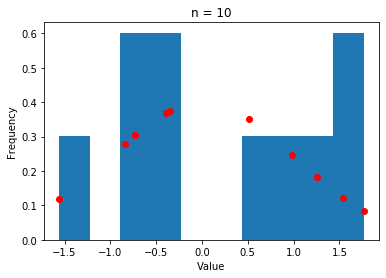

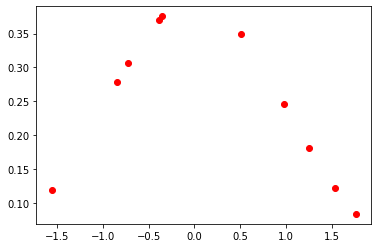

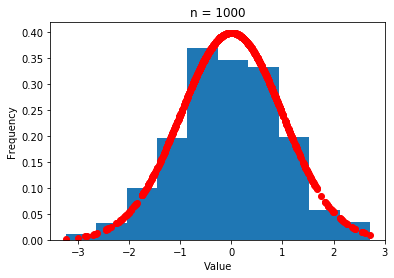

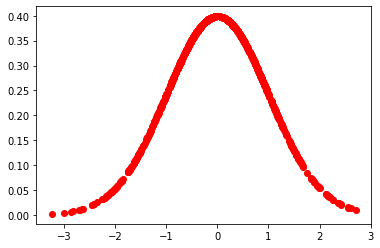

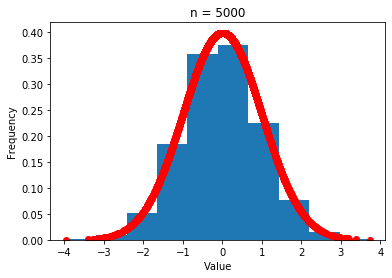

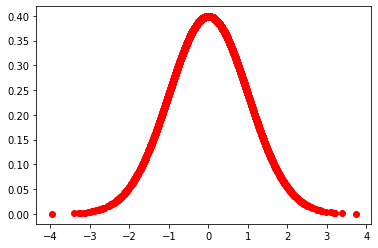

In [14]:
generated_numbers = draw_histograms()

## Wnioski:
Wraz ze zwiększaniem *n* - rozkład liczb jest coraz bardziej podobny do rozkładu normalnego.

Transformacja Boxa-Mullera jest jedną z najpopularniejszych metod generowania liczb losowych o rozkładzie Gaussa.

#### 2. Wykonaj test statystyczny Shapiro-Wilka, przedstaw uzyskaną p-wartość, informacje czy hipoteza zerowa została przyjęta/odrzucona dla $\alpha = 0, 05$ i czy w związku z tym są podstawy do stwierdzenia że liczby pochodzą z rozkładu normalnego.

Funkcja **shapiro_wilk_test** przyjmuje wektor liczb *numbers* i parametr *alpha*. Korzystając z testu statystycznego Shapiro-Wilka z biblioteki *scipy* oblicza p-wartość i porównuje ją z parametrem *alpha*, wypisując rezultaty.

In [15]:
def shapiro_wilk_test(numbers, alpha = 0.05):
    for num in numbers:
        print("For n = ", len(num))
        stat, p = stats.shapiro(num)
        
        print("Statistcis: ", stat)
        print("p_value = ", p)
        if p < alpha:
            print("Null hypothesis is rejected")
            
        else:
            print("Null hypothesis is accepted")
        print("")

In [16]:
shapiro_wilk_test(generated_numbers)

For n =  10
Statistcis:  0.9371771216392517
p_value =  0.5220516324043274
Null hypothesis is accepted

For n =  1000
Statistcis:  0.9976849555969238
p_value =  0.17429588735103607
Null hypothesis is accepted

For n =  5000
Statistcis:  0.99980229139328
p_value =  0.9492906928062439
Null hypothesis is accepted



## Wnioski:

Test *Shapiro-Wilka* wskazał, że dane pochodzą z rozkładu normalnego, ponieważ uzyskana *p-wartość* nie jest mniejsza niż 0.05, więc hipoteza zerowa została przyjęta. Prawdopodobieństwo, że dane są naprawdę przypadkowe jest większe dla nie dużych wartości *n*.

Test ten jest uznawany za najlepszy test do sprawdzenia normalności rozkładu zmiennej losowej. Głównym atutem tego testu jest jego duża moc, tzn. dla ustalonego α prawdopodobieństwo odrzucenia hipotezy $H_0$, jeśli jest ona fałszywa, jest większe niż w przypadku innych tego typu testów. Jest on stosowany przeważnie do mniejszych grup (n < 100). W przypadku większych prób używa się testu Kołmogorowa-Smirnowa (jako jeden z przedziałów podaje się n > 100).

Mimo, że hipoteza zerowa została przyjęta, to jest całkowicie możliwe, że dla p > 0.05 dane nie pochodzą z rozkładu normalnego. Brak odrzucenia może wynikać z tego, że wielkość próby jest zbyt mała, aby to wykryć.

## Zadanie 3 Metoda Monte Carlo

#### Napisz funkcję która zwróci przybliżoną wartość liczby pi wykorzystującą metodę Monte Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować liczbę wylosowanych punktów jako parametr. Zwizualizuj koło, zaznaczając jednym kolorem punkty które trafiły do jego wnętrza, a drugim te które trafiły na zewnątrz. Na wykresie zwizualizuj błąd bezwzględny wraz z rosnącą liczbą punktów.

Funkcja **monte_carlo** przyjmuje liczbę punktów *number_of_points*, które mają zostać wygenerowane. Funkcja ta korzystając z metody Monte Carlo losuje zadaną liczbę punktów, sprawdzając czy leżą one wewnątrz koła jednostkowego i w ten sposób przybliża liczbę $\pi$. Przedstawia również na wykresie wygenerowane punkty.

In [17]:
def monte_carlo(number_of_points=10000):
    x_inside = []
    y_inside = []
    
    x_outside = []
    y_outside = []
    
    for i in range(0, number_of_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        if math.sqrt(x**2 + y**2) <= 1:
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)
    
    pi = (float(len(x_inside)) / number_of_points) * 4
    print("Number of points = ", number_of_points)
    print("Pi = ", pi)
    
    fig = plt.figure(figsize = (10, 10))
    plt.plot(x_inside, y_inside, 'ro', color='#D4AC0D')
    plt.plot(x_outside, y_outside, 'ro', color='#990000')
    plt.show()
    
    return pi

Number of points =  10000
Pi =  3.162


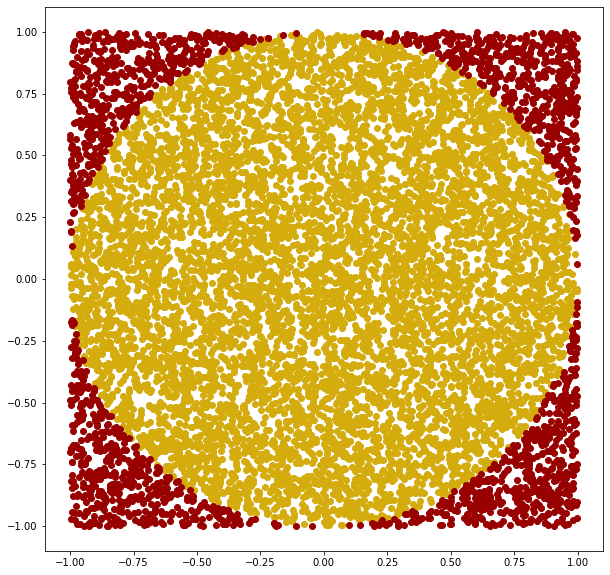

3.162

In [18]:
monte_carlo()

Funkcja **absolute_error** liczy błąd bezwzględny liczby i jej przybliżenia.

In [19]:
def absolute_error(approximation, real_value=math.pi):
    return abs(approximation - real_value)

Funkcja **calculate_error** przedstawia na wykresie błąd bezwzględny wraz z rosnącą liczbą punktów dla metody Monte Carlo.

In [20]:
def calculate_error():
    points = []
    error = []
    for i in [5, 10, 100, 500, 1000, 5000, 8000, 10000, 25000, 50000, 100000]:
        approximation_pi = monte_carlo(i)
        error.append(absolute_error(approximation_pi))
        points.append(i)
    plt.plot(points, error)
    plt.xlabel('Number of points')
    plt.ylabel('Absolute error')
    plt.title('Monte Carlo method error')
    plt.show()

Number of points =  5
Pi =  2.4


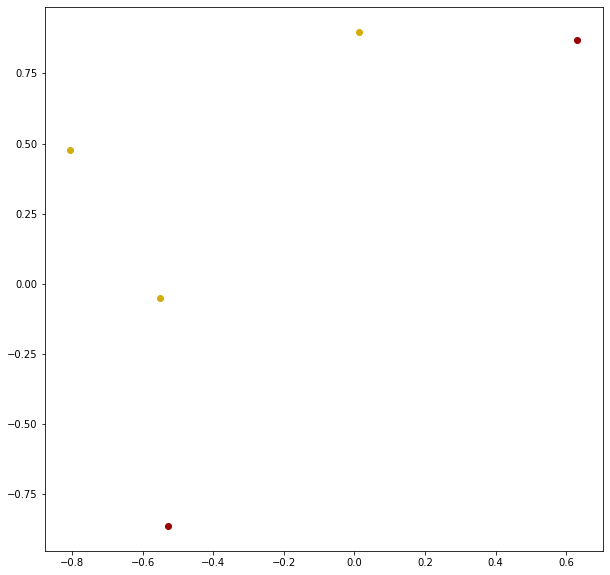

Number of points =  10
Pi =  3.2


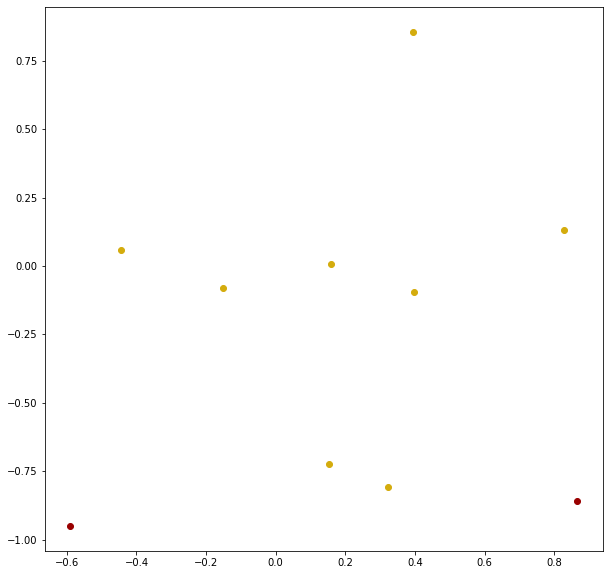

Number of points =  100
Pi =  3.08


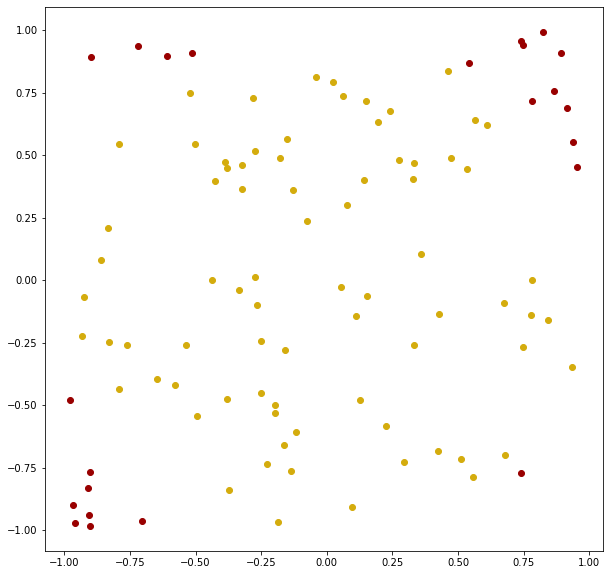

Number of points =  500
Pi =  3.064


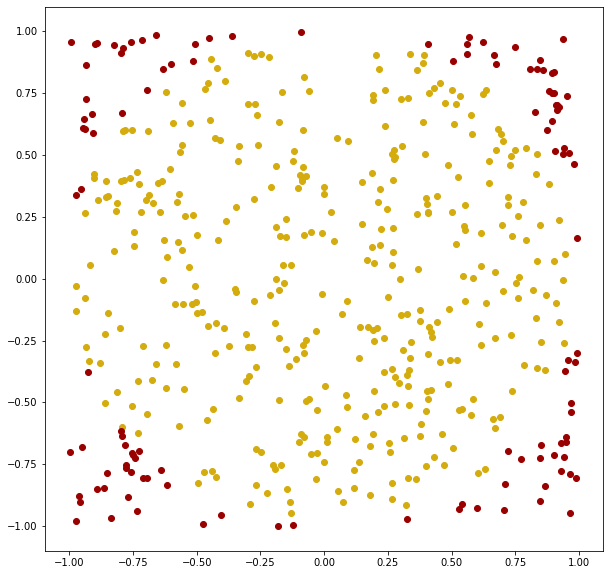

Number of points =  1000
Pi =  3.156


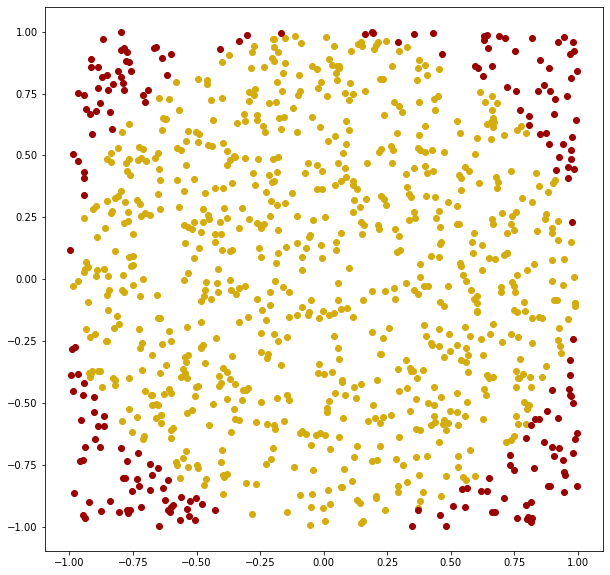

Number of points =  5000
Pi =  3.1304


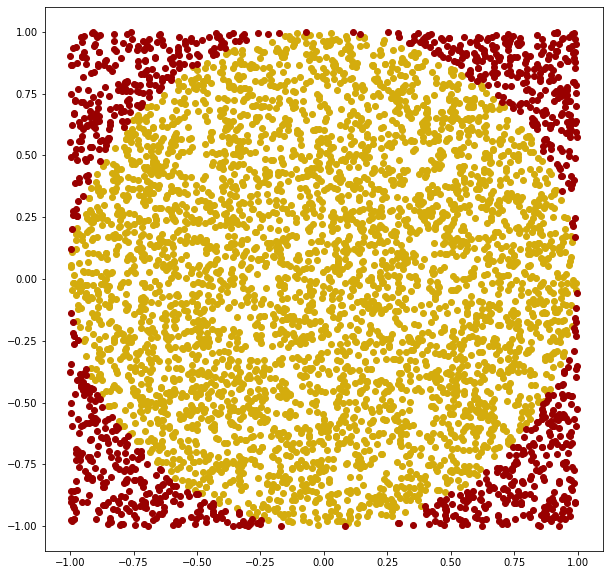

Number of points =  8000
Pi =  3.1545


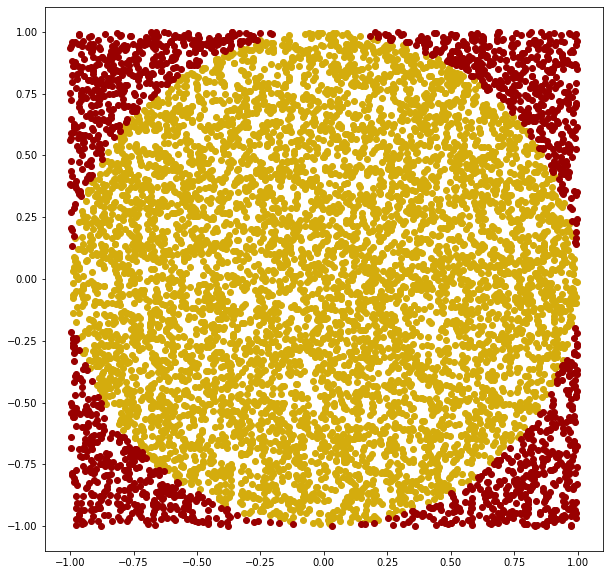

Number of points =  10000
Pi =  3.1512


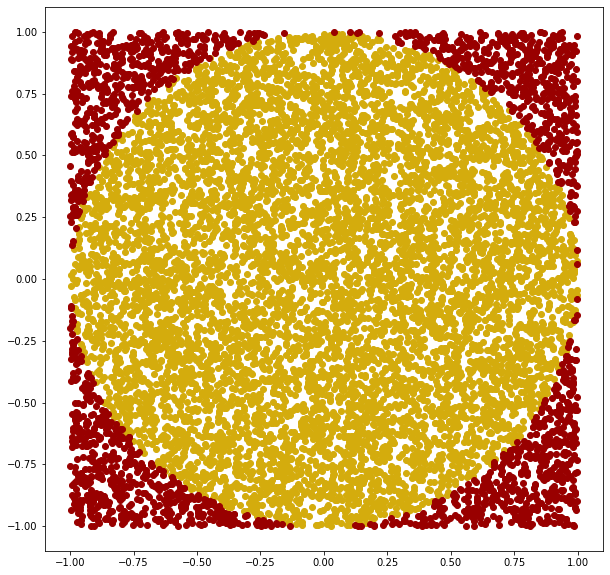

Number of points =  25000
Pi =  3.12992


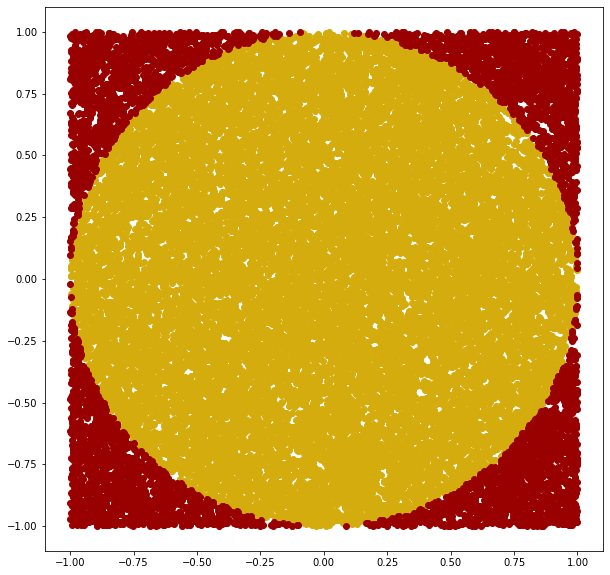

Number of points =  50000
Pi =  3.14416


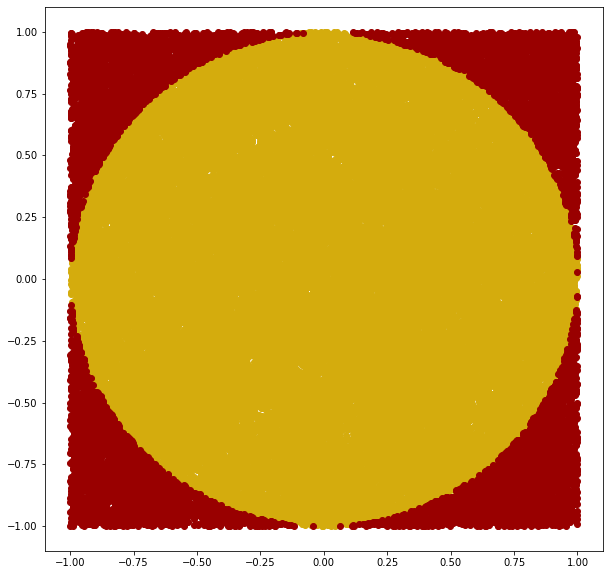

Number of points =  100000
Pi =  3.1468


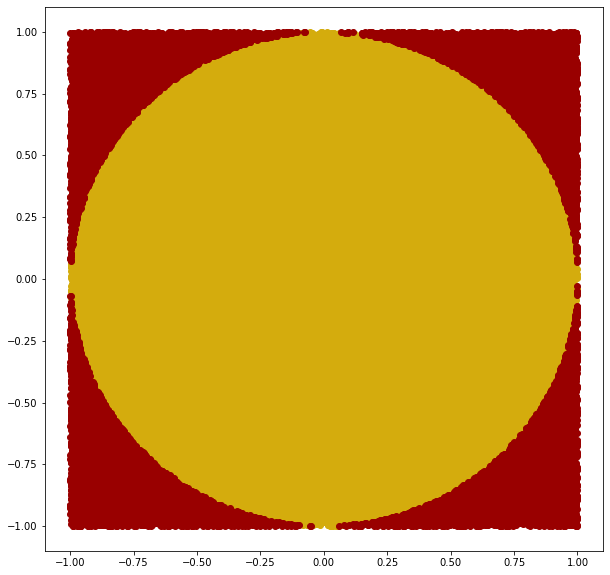

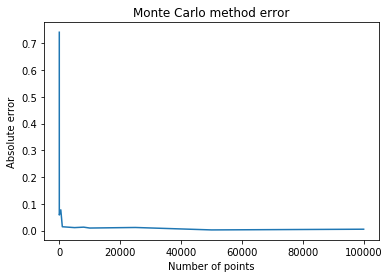

In [21]:
calculate_error()

## Wnioski:

Dokładność wyniku (liczby $\pi$) uzyskanego metodą Monte Carlo jest zależna od liczby sprawdzeń i jakości użytego generatora liczb pseudolosowych. Im większa liczba generowanych punktów, tym liczba $\pi$ jest dokładniejsza, co widać na wizualizacji kół oraz na wykresie błędu bezwzględnego. Dla liczby punktów większej bądź równej 50000 przybliżenie to jest satysfakcjonujące.

Metoda Monte Carlo ma wiele zastosowań m.in. :
* obliczanie całek oznaczonych
* sprawdzanie jakości i niezawodności produktów, np. do oszacowania długości życia żarówki wolframowej
* systemy obsługi klientów, np. przepustowość kas w sklepie lub długość oczekiwania na połączenie z infolinią
* zastosowania w fizyce, np. rozszczepianie cząstek
* analiza danych w takich dziedzinach jak finanse